# Apresentação do Problema

Em muitos setores, como bancos, e-commerces e seguros, a fraude é um problema sério e pode causar grandes prejuízos financeiros, impactando negativamente a confiança dos clientes desses setores. O objetivo de um sistema de detecção de fraudes é identificar transações ou atividades fraudulentas com a maior precisão possível, minimizando transações que possam ser verdadeiras mas não são, e transações legítimas que são incorretamente classificadas como fraudulentas.

Um dos desafios na detecção de fraudes é que os dados geralmente são altamente desbalanceados, com a maioria das transações sendo legítimas e apenas uma pequena porcentagem sendo fraudulentas. Além disso, os fraudadores estão constantemente adaptando suas táticas, o que torna o problema dinâmico e em constante evolução.

Neste contexto, temos dois conjuntos de dados: um de treino (fraudTrain.csv) e outro de teste (fraudTest.csv). O objetivo é desenvolver um modelo preditivo capaz de identificar transações suspeitas com base em um conjunto de características fornecidas, utilizando o conjunto de treino para construir o modelo e o conjunto de testes para avaliar seu desempenho.


# Objetivo

O objetivo principal deste projeto é desenvolver e avaliar modelos preditivos capazes de identificar transações fraudulentas de maneira eficaz e eficiente. Especificamente, buscamos:

1 - Identificar e selecionar as características mais relevantes que ajudam a diferenciar transações legítimas de fraudulentas.

2- Explorar e comparar diferentes técnicas de aprendizado de máquina para a detecção de fraudes.

3 - Desenvolver estratégias para lidar com o problema do desbalanceamento de classes no dataset.

4- Minimizar a taxa de falsos positivos e falsos negativos, otimizando assim a eficiência do modelo na detecção de fraudes.

Esses objetivos servirão como base para criar um sistema de detecção de fraudes que possa ser implementado em cenários reais para prevenir perdas financeiras e proteger a integridade das transações.


## Biblioteca

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Dataset

In [2]:
#Carregando os Dataset e concatenando os datasets
df1 = pd.read_csv('fraudTest.csv',decimal=",",thousands=".")
df2 = pd.read_csv('fraudTrain.csv',decimal=",",thousands=".")
df3 = pd.concat([df1,df2],axis=0)

In [3]:
#Exibindo informações do DataSet
#print(df3.info())
#print(df3.describe())
#print(df3.tail())

In [4]:
## ACRESCENTANDO FEATURES, TRANSFORMAÇÃO DE FEATURES E EXCLUSÃO DE FEATURES

df3['trans_date_trans_time'] = pd.to_datetime(df3['trans_date_trans_time']) # Convertendo a feature de data

df3['day'] = df3['trans_date_trans_time'].dt.day # Criando uma nova feature 'Day'

df3['month'] = df3['trans_date_trans_time'].dt.month # Criando uma nova feature 'month'

df3['year'] = df3['trans_date_trans_time'].dt.year # Criando uma nova feature 'year'

df3['dob'] = pd.to_datetime(df3['dob']) # Convertendo a feature 'dob' em data

df3['age'] = (df3['trans_date_trans_time'] - df3['dob']).dt.days // 365 # Criando uma nova feature 'age'

df3['genero'] = df3['gender'].map({'M': 1,'F': 0}) # Transformando a featute categória 'gender' em feature númerica

df3.drop(['unix_time'],axis=1,inplace=True) # Exluindo a feature 'unix_time'

df3.drop(['dob'], axis=1, inplace=True) # Exluindo a feature 'dob'

meses_dict = {1:"Janeiro",2:"Fevereiro",3:"Março",4:"Abril",5:"Maio",6:"Junho",7:"Julho",8:"Agosto",9:"Setembro",10:"Outubro",11:"Novembro",12:"Dezembro"} # Dicionário para apoio a feature 'month_name'

df3['month_name'] = df3['month'].map(meses_dict) # Adição da nova feature 'month_name'

In [5]:
# ESTABELECENDO UM NOVO DATAFRAME APENAS COM AS OPERAÇÕES FRAUDULENTAS

df_number = df3.select_dtypes(include= np.number)
df_number.head(5)

#dffraud = df3[df3['is_fraud'] == 1] # Filtrando o dataset em apenas transações fraudulentas
#dffraud.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,day,month,year,age,genero
0,0,2291163933867244,286,29209,339659,-809355,333497,33986391,-81200714,0,21,6,2020,52,1
1,1,3573030041201292,2984,84002,403207,-110436,302,39450497999999996,-109960431,0,21,6,2020,30,0
2,2,3598215285024754,4128,11710,406729,-735365,34496,4049581,-74196111,0,21,6,2020,49,0
3,3,3591919803438423,6005,32780,285697,-808191,54767,28812397999999998,-80883061,0,21,6,2020,32,1
4,4,3526826139003047,319,49632,442529,-8501700000000001,1126,44959148,-85884734,0,21,6,2020,65,1


In [6]:
# EXIBIÇÃO DO DATAFRAME

#df3.info()
df3.shape
#df3.shape
#df3.describe().T

(1852394, 27)

Dados Dataset

trans_date_trans_time: A data e hora da transação.

cc_num: número do cartão de crédito.

merchant: comerciante que estava sendo pago.

category: Em que área esse comerciante atua.

amt: Quantidade de dinheiro em dólares americanos.

first: nome do titular do cartão.

last: sobrenome do titular do cartão.

gender: Gênero do titular do cartão. Apenas masculino e feminino!

street: Rua da residência do titular do cartão

city:cidade de residência do titular do cartão

state: estado de residência do titular do cartão

zip: CEP da residência do titular do cartão

lat:latitude do titular do cartão

long:longitude do titular do cartão

city_pop:População da cidade

job:comércio do titular do cartão

dob:Data de nascimento do titular do cartão

trans_num: ID da transação

unix_time: Hora Unix que é a hora calculada desde 1970 até hoje.

merch_lat: latitude do comerciante

merch_long:longitude do comerciante

is_fraud: Se a transação é fraudulenta(1) ou não(0)

## Dados missing

In [7]:
#Identificando quais coluns estão vazias - Sem dados missing
print("df3 - Quantidade de dados Nulos\n")
print(df3.isnull().sum())

df3 - Quantidade de dados Nulos

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
day                      0
month                    0
year                     0
age                      0
genero                   0
month_name               0
dtype: int64


## Dados duplicados

In [8]:
#Identificando se há dados duplicados
df3.duplicated()
#dfteste.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1296670,False
1296671,False
1296672,False
1296673,False


## Análise Exploratória dos dados

Total de transações: 1852394
Total de fraudes: 9651
Porcentagem de fraudes: 0.52%
Total de transações: 1852394
Total de não fraudes: 1842743
Porcentagem de não fraudes: 99.48%


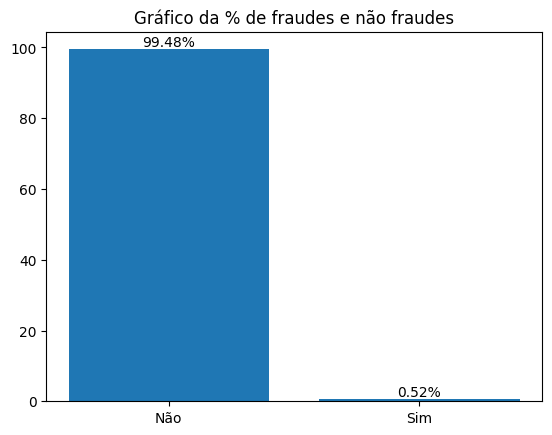

In [9]:
# 1 - TOTAL DE FRAUDES E NÃO FRAUDES


total_transacoes = len(df3)
total_fraudes = len(df3[df3['is_fraud'] == 1])
porcentagem_fraudes = (total_fraudes / total_transacoes) * 100

print(f"Total de transações: {total_transacoes}")
print(f"Total de fraudes: {total_fraudes}")
print(f"Porcentagem de fraudes: {porcentagem_fraudes:.2f}%")

total_transacoes = len(df3)
total_n_fraude = len(df3[df3['is_fraud'] == 0])
porcentagem_n_fraude = (total_n_fraude / total_transacoes) * 100

print(f"Total de transações: {total_transacoes}")
print(f"Total de não fraudes: {total_n_fraude}")
print(f"Porcentagem de não fraudes: {porcentagem_n_fraude:.2f}%")

# GRÁFICO DE BARRAS
bar = df3["is_fraud"].value_counts().reset_index()
labels = ["Não", "Sim"]
percentages = bar["count"] / bar["count"].sum() * 100


plt.bar(labels, percentages)

for i, percentages in enumerate(percentages):
  plt.text(i,percentages,f"{percentages:.2f}%", ha="center", va="bottom")

plt.title("Gráfico da % de fraudes e não fraudes")
plt.show()

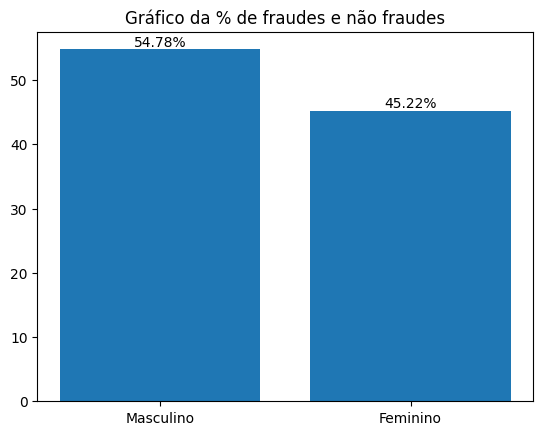

,count
genero,
0,1014749
1,837645


In [10]:
# 7 - QUAL É O GENÊRO MAIS AFETADO QUANDO OLHAMOS SOMENTE AS TRANSAÇÕES FRAUDULENTAS

labels = ["Masculino", "Feminino"]
gender_counts = df3["genero"].value_counts()
percentages = (gender_counts / gender_counts.sum()) * 100

plt.bar(labels, percentages)

for i, percentages in enumerate(percentages):
  plt.text(i,percentages,f"{percentages:.2f}%", ha="center", va="bottom")

plt.title("Gráfico da % de fraudes e não fraudes")
plt.show()

fraud = df3['genero'].value_counts()
display(fraud)


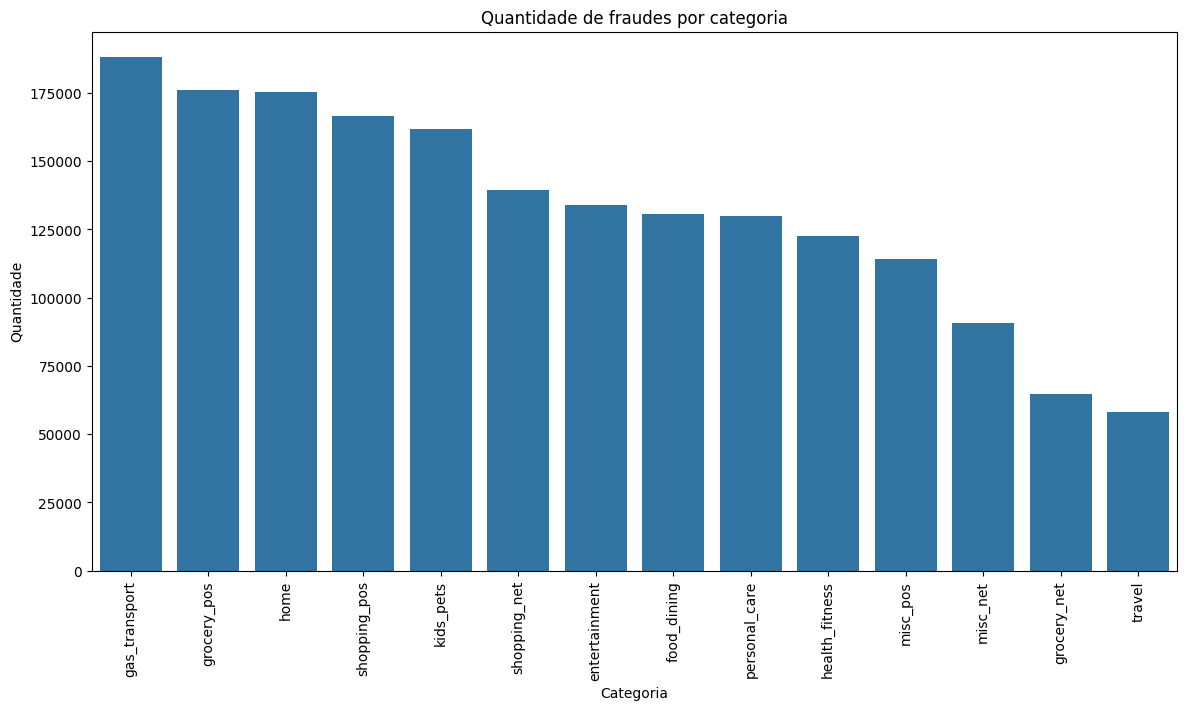

In [11]:
# 8 - CATEGORIA DE ESTABELECIMENTO COM MAIOR RECORRÊNCIA DE FRAUDE

plt.figure(figsize= (14, 7))
sns.countplot(data=df3, x='category', order=df3['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Quantidade de fraudes por categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()

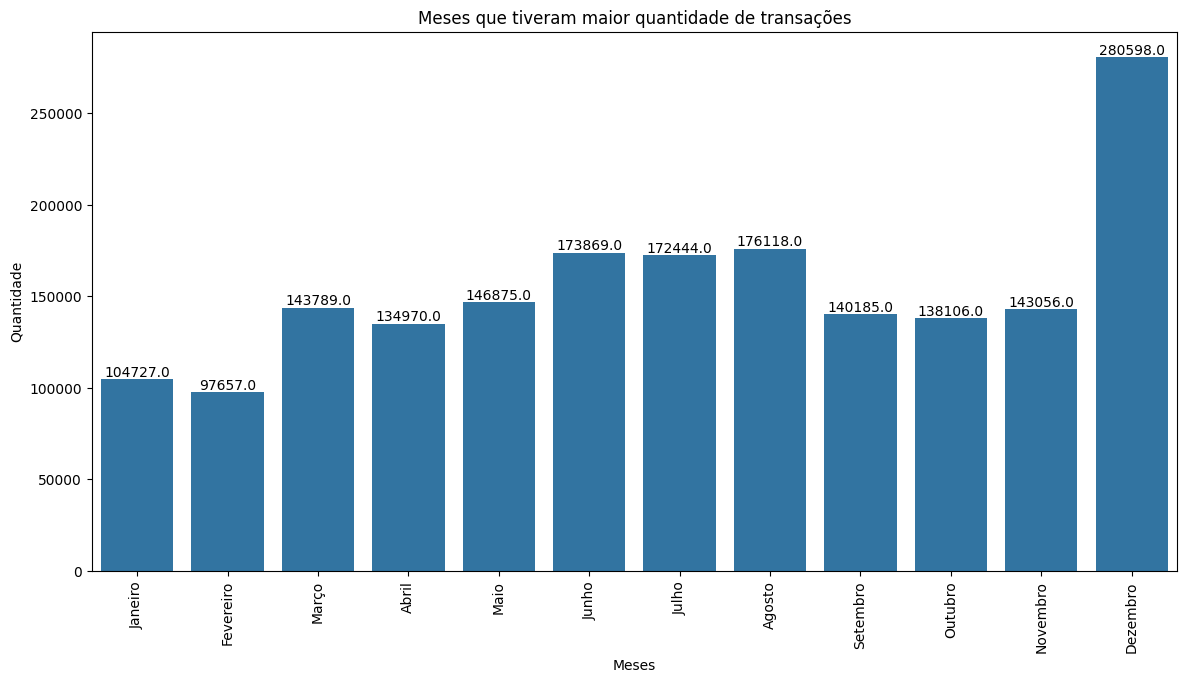

In [12]:
# 9 - QUAL É O MÊS QUE REGISTROU MAIS TRANSAÇÕES (NÃO FRAUDULENTAS E FRAUDULENTAS)

plt.figure(figsize=(14,7))
ax = sns.countplot(data=df3, x='month_name', order=meses_dict.values())
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.title('Meses que tiveram maior quantidade de transações')
plt.xlabel('Meses')
plt.ylabel('Quantidade')
plt.show()

In [13]:
# 10 - Qual é o periodo que teve maior ocorrência (manha, tarde ou noite)?


# Convert to datetime, handling errors by coercing invalid values to NaT

df3['hour'] = df3['trans_date_trans_time'].dt.hour

def categorize_period(hour):
    if 5 <= hour < 12:
        return 'Manhã'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

df3['period'] = df3['hour'].apply(categorize_period)

period_counts = df3['period'].value_counts()

max_period = period_counts.idxmax()
max_count = period_counts.max()

print(f"O período com maior ocorrência é: {max_period} com {max_count} transações.")

O período com maior ocorrência é: Noite com 869263 transações.


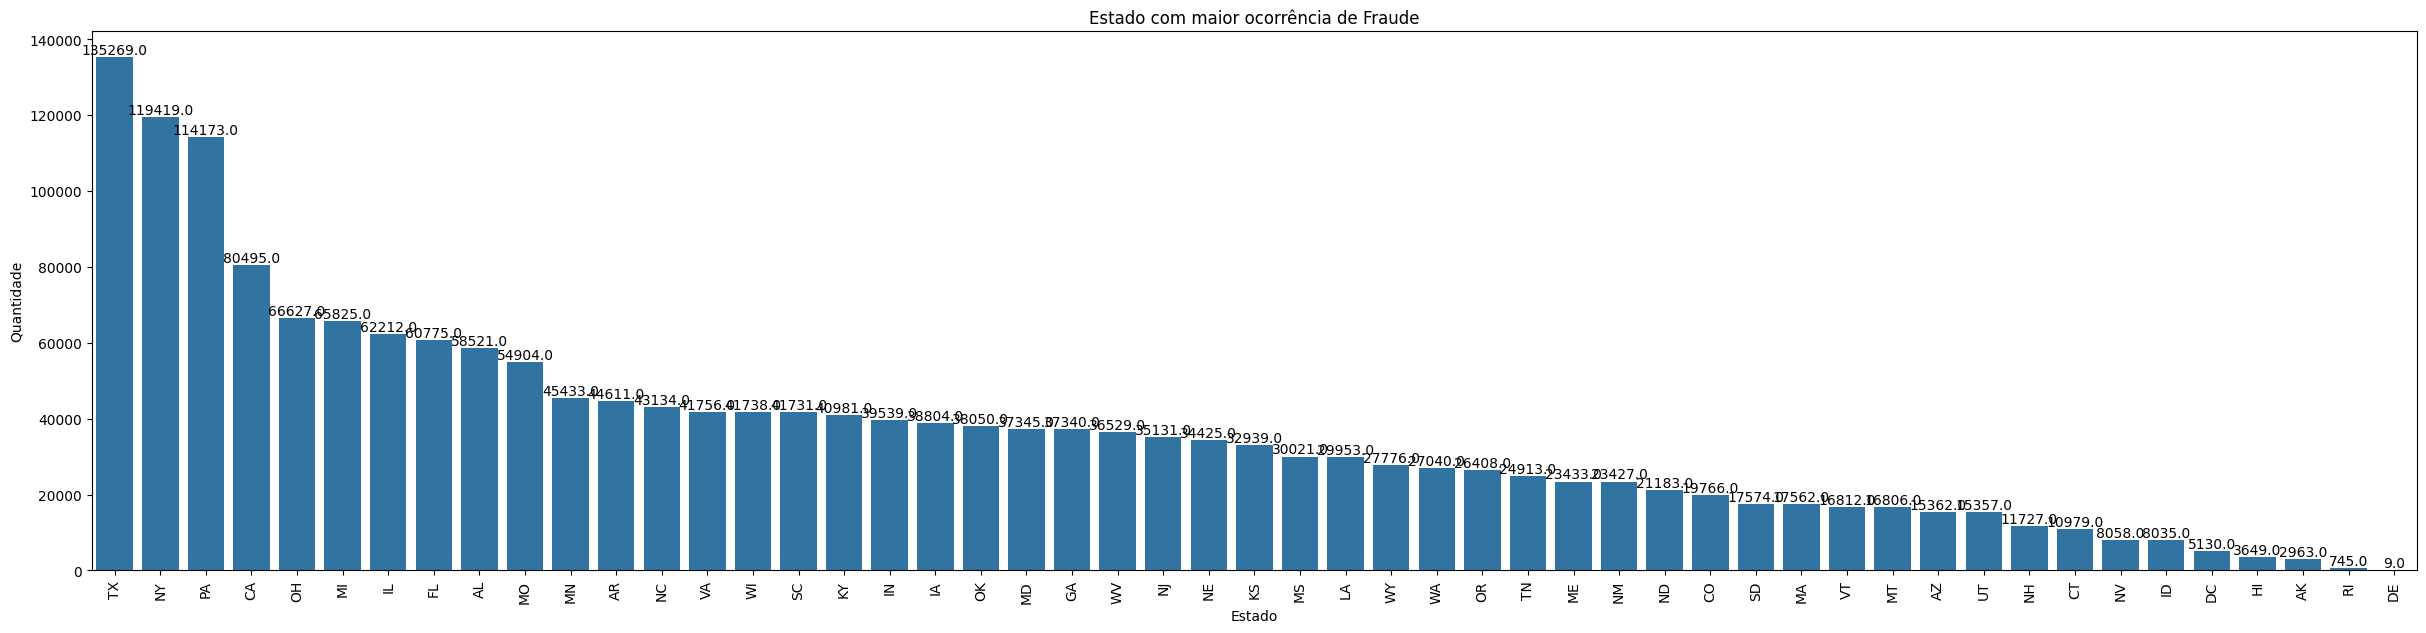

In [14]:
# 11 - ESTADO COM A MAIOR OCORRÊNCIA DE FRAUDES

plt.figure(figsize=(30,7))
ax = sns.countplot(data=df3, x='state', order=df3['state'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.title('Estado com maior ocorrência de Fraude')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.show()

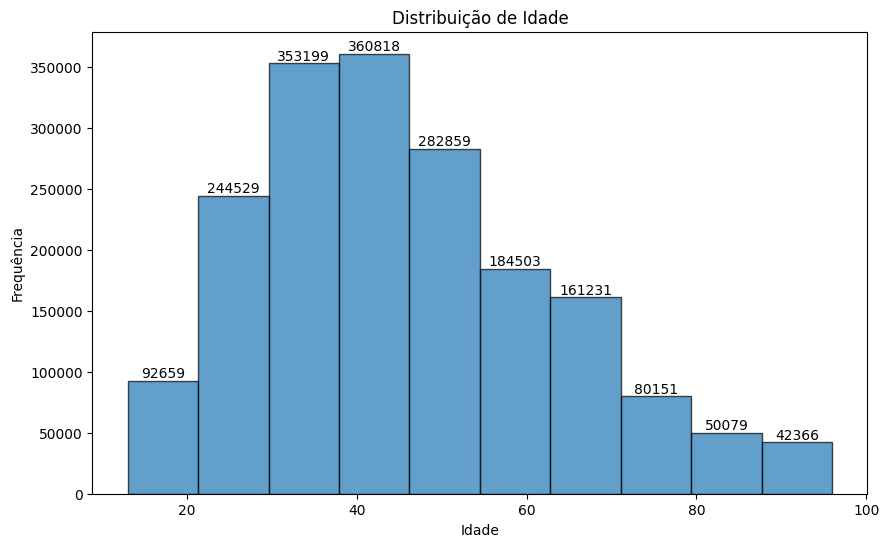

In [15]:
# 12 - Qual é a faixa etária com a maior ocorrência de fraude ? E com menor ocorrencia?


plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df3['age'], bins=10, edgecolor='k', alpha=0.7)  # Cria o histograma

# Adicionar rótulos de dados
patches = plt.gca().patches
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Distribuição de Idade')  # Título do gráfico
plt.xlabel('Idade')  # Rótulo do eixo X
plt.ylabel('Frequência')  # Rótulo do eixo Y
plt.show()  # Exibe o gráfico

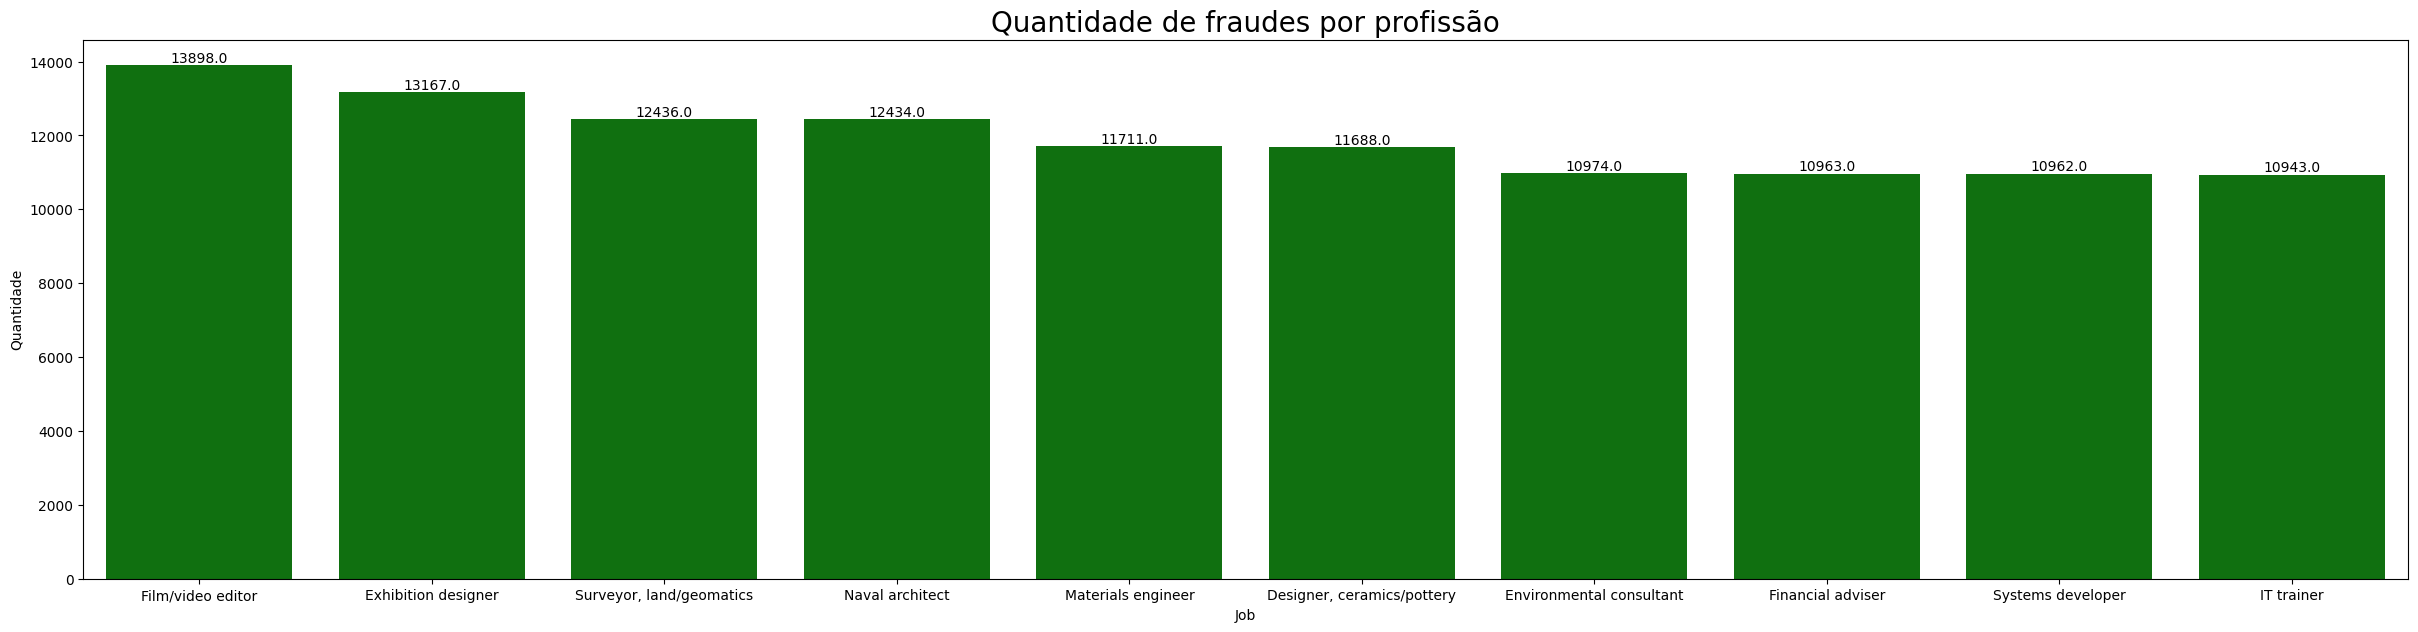

In [16]:
# 14 - PROFISSÕES COM MAIOR ÍNDICE DE FRAUD

idx = fraud.index
val = fraud.values

plt.figure(figsize= (30, 7))
ax = sns.countplot(data=df3, x='job', order=df3['job'].value_counts().index, color='green')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.title('Quantidade de fraudes por profissão', fontsize=20)
plt.xlabel('Job')
plt.ylabel('Quantidade')
plt.xlim(-0.5,9.5)
plt.show()

In [17]:
# 13 - Quantas tentativas são feitas a ponto de gerar uma fraude

num_fraudes = df3['is_fraud'].sum()
total_transacoes = df3['is_fraud'].count()
media = num_fraudes / total_transacoes

print(f'a cada: {media} temos uma fraude')

a cada: 0.005210014716091717 temos uma fraude


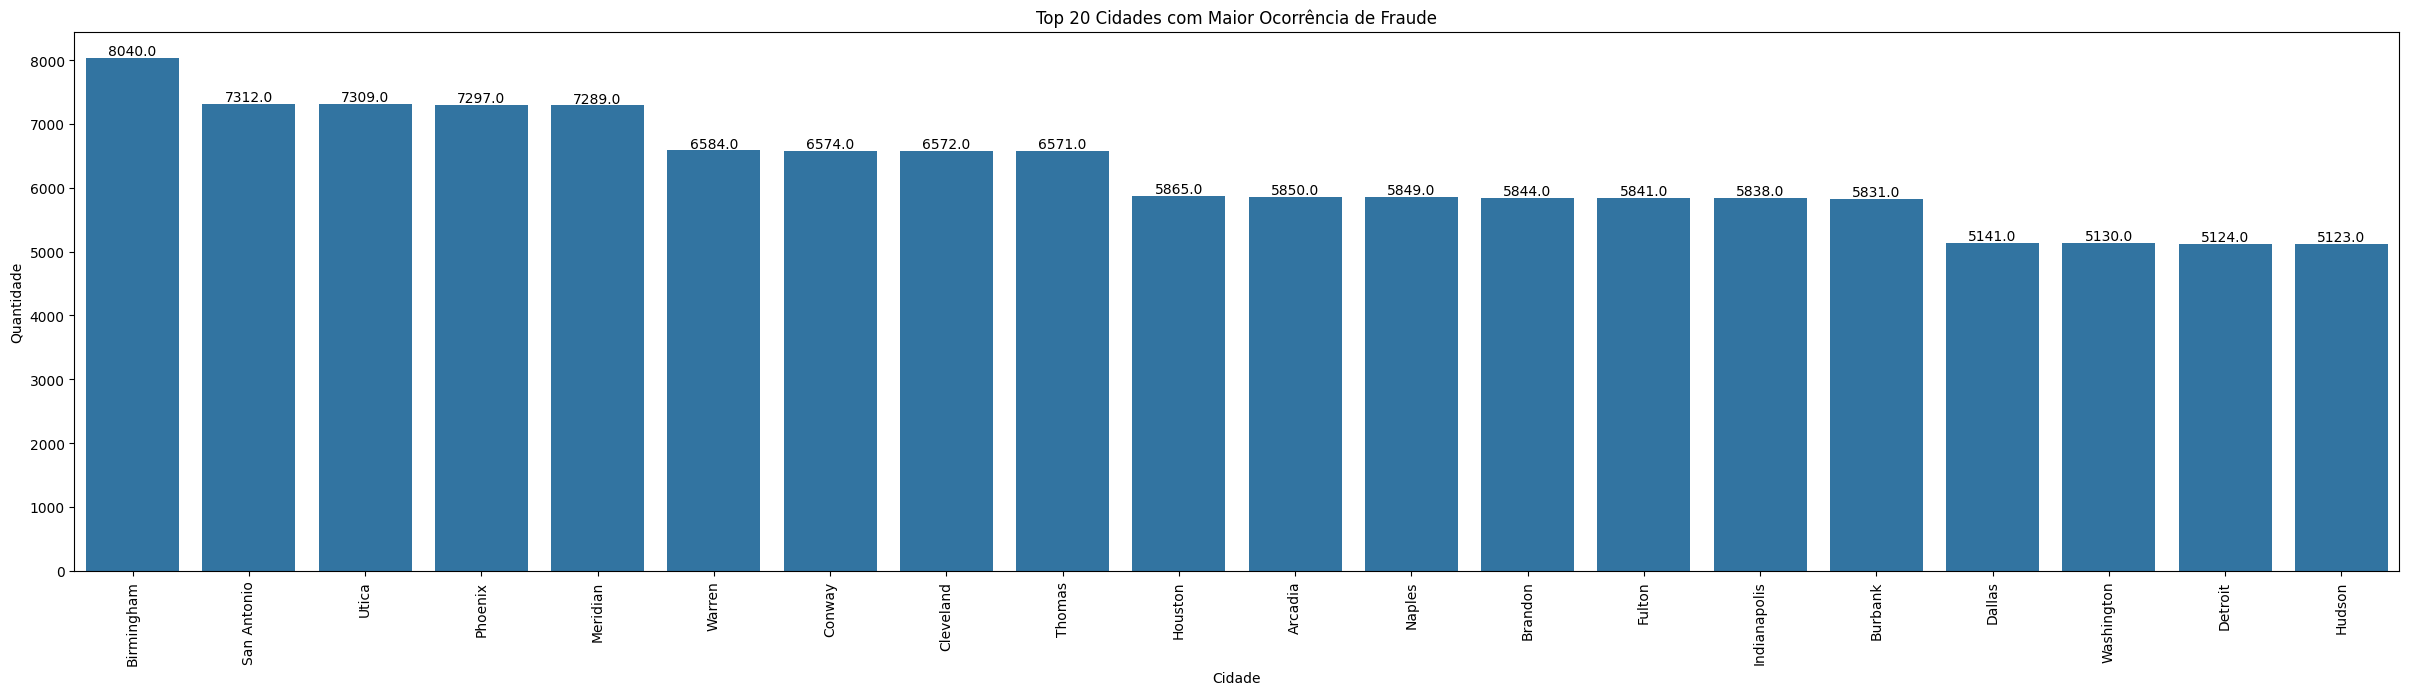

In [18]:
# Quais as 20 cidades com maior número de fraudes

top_cities = df3['city'].value_counts().head(20).index
plt.figure(figsize=(30,7))
ax = sns.countplot(data=df3[df3['city'].isin(top_cities)], x='city', order=top_cities)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Top 20 Cidades com Maior Ocorrência de Fraude')
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.show()

In [19]:
# Para fazer a matriz de correlação precisamos transformar as variáveis categóricas em numericas utilizando One-Hot Encoding
# Então selecionamos as variáveis: genero, cidade e estado.

top_cities = df3['city'].value_counts().index[:5]
df3['city'] = df3['city'].apply(lambda x: x if x in top_cities else 'Other')

top_states = df3['state'].value_counts().index[:5]
df3['state'] = df3['state'].apply(lambda x: x if x in top_states else 'Other')


df3_encoded = pd.get_dummies(df3, columns=['city', 'state','gender'], drop_first=False)

print(df3_encoded.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category   amt   first  \
0                 fraud_Kirlin and Sons   personal_care   286    Jeff   
1                  fraud_Sporer-Keebler   personal_care  2984  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  4128  Ashley   
3                     fraud_Haley Group        misc_pos  6005   Brian   
4                 fraud_Johnston-Casper          travel   319  Nathan   

       last                       street    zip  ...  city_San Antonio  \
0   Elliott            351 Darlene Green  29209  ...             False   
1  Williams             3638 Marsh Union  84002  ...             False

is_fraud       1.000000
amt            0.198555
gender_M       0.005844
state_NY       0.003292
state_Other    0.000540
state_OH       0.000518
state_CA      -0.000639
state_PA      -0.000712
state_TX      -0.003250
gender_F      -0.005844
Name: is_fraud, dtype: float64


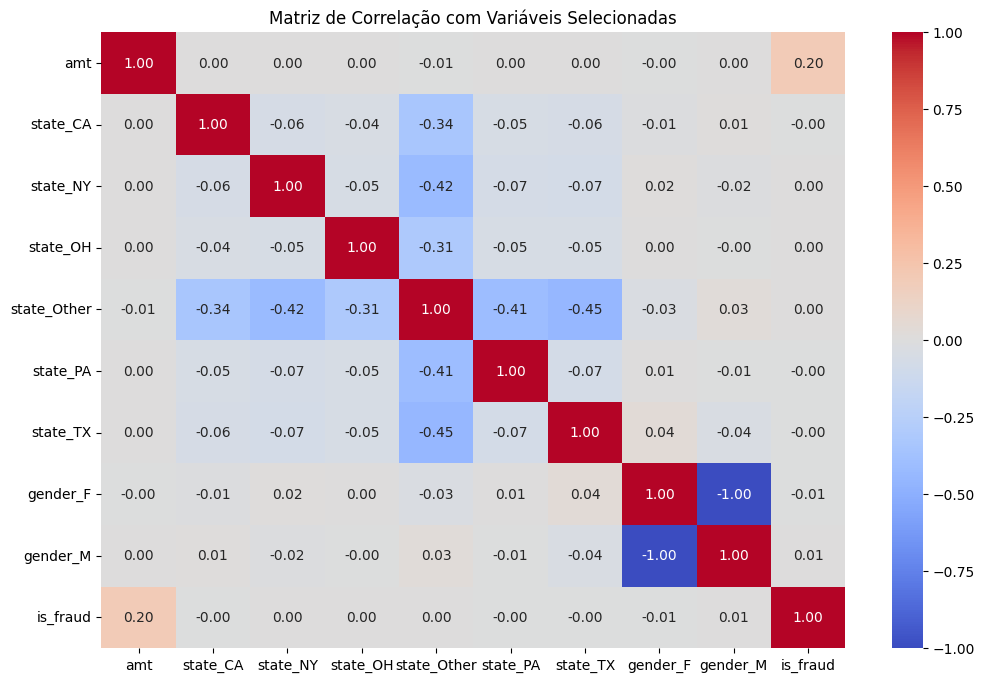

In [20]:
#Fazer matriz de correlação para verificar nível de associação entre as variáveis genero, cidade e estado em relação a fraude

numerical_columns = ['amt']
categorical_columns = [col for col in df3_encoded.columns if 'gender_' in col or 'state_' in col or 'category_' in col]
target_column = ['is_fraud']

selected_columns = numerical_columns + categorical_columns + target_column

correlation_matrix = df3_encoded[selected_columns].corr()


print(correlation_matrix['is_fraud'].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Matriz de Correlação com Variáveis Selecionadas')
plt.show()

# Identificação e tratamento de Outliers


In [21]:
# Função para encontrar outliers com Z-Score

def detect_outliers_zscore(df, threshold=3):
    z_scores = (df['amt'] - df['amt'].mean()) / df['amt'].std()
    return df[np.abs(z_scores) > threshold]

# Identificando outliers na coluna 'amt'
outliers_zscore = detect_outliers_zscore(df3)
print(f"Outliers encontrados com Z-Score:\n{outliers_zscore}")

Outliers encontrados com Z-Score:
         Unnamed: 0 trans_date_trans_time               cc_num  \
133             133   2020-06-21 12:55:19        4683638447911   
167             167   2020-06-21 13:08:46     6011109736646996   
428             428   2020-06-21 14:38:09       38530489946071   
464             464   2020-06-21 14:54:46  4798937978667559470   
600             600   2020-06-21 15:37:37      349612764943496   
...             ...                   ...                  ...   
1296014     1296014   2020-06-21 06:21:46      378278619832195   
1296211     1296211   2020-06-21 08:05:27     3598215285024754   
1296228     1296228   2020-06-21 08:10:12        4538566639857   
1296482     1296482   2020-06-21 10:33:36     4839615922685395   
1296547     1296547   2020-06-21 11:07:51        4755696071492   

                                        merchant      category     amt  \
133                         fraud_Gislason Group        travel   55803   
167                      

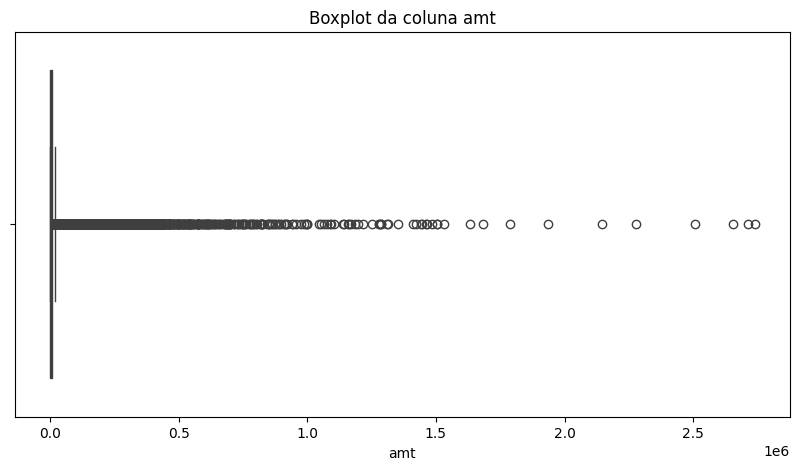

In [22]:
#Boxplot

plt.figure(figsize=(10, 5))
sns.boxplot(x=df3['amt'])
plt.title(f"Boxplot da coluna amt")
plt.show()

In [23]:
# Tratando os Outliers
# Selecionar a coluna que será analisada para outliers (exemplo: 'amt')

# Calcular o primeiro e terceiro quartis (Q1 e Q3)
Q1 = df3['amt'].quantile(0.25)
Q3 = df3['amt'].quantile(0.75)
IQR = Q3 - Q1  # Intervalo interquartil
# Definir os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = df3[(df3['amt'] < lower_bound) | (df3['amt'] > upper_bound)]

# Calcular a média da coluna, excluindo os outliers
mean_amt = df3[(df3['amt'] >= lower_bound) & (df3['amt'] <= upper_bound)]['amt'].mean()
# Substituir os outliers pela média calculada
df3['amt'] = np.where((df3['amt'] < lower_bound) | (df3['amt'] > upper_bound), mean_amt, df3['amt'])

# Verificar o resultado
print(f"Média calculada para substituir os outliers: {mean_amt}")
print(df3['amt'].describe())  # Estatísticas após o tratamento dos outliers

Média calculada para substituir os outliers: 4508.856558368486
count    1.852394e+06
mean     4.508857e+03
std      4.137353e+03
min      1.000000e+01
25%      7.680000e+02
50%      3.952000e+03
75%      7.034000e+03
max      1.840300e+04
Name: amt, dtype: float64


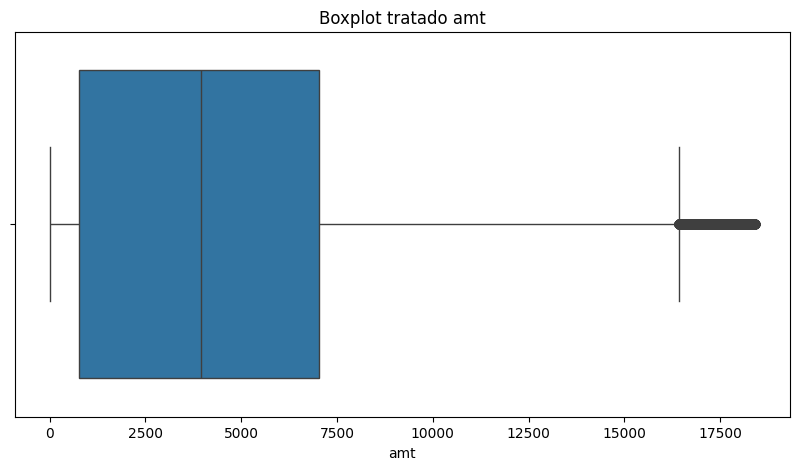

In [24]:
# Boxplot com Outliers tratados

plt.figure(figsize=(10, 5))
sns.boxplot(x=df3['amt'])
plt.title(f"Boxplot tratado amt")
plt.show()

# PCA (Componentes Principais)

In [25]:
from sklearn.preprocessing import StandardScaler

df = df3_encoded.copy()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

print(pd.DataFrame(df_scaled, columns=numeric_columns).head())

   Unnamed: 0    cc_num       amt       zip       lat      long  city_pop  \
0   -1.464098 -0.317081 -0.399827 -0.729275 -0.144115  0.161301  0.812151   
1   -1.464095 -0.316101 -0.222748  1.309015 -0.144115  0.161301 -0.293019   
2   -1.464092 -0.316082 -0.147664 -1.380235 -0.144115  0.161301 -0.179602   
3   -1.464090 -0.316087 -0.024470 -0.596435 -0.144115  0.161301 -0.112365   
4   -1.464087 -0.316137 -0.397661  0.030457 -0.144115 -5.845157 -0.290286   

   merch_lat  merch_long  is_fraud       age    genero  
0  -0.531331    0.541825 -0.072369  0.356011  1.100650  
1   1.943735    0.541825 -0.072369 -0.906621 -0.908554  
2  -0.531331    0.541825 -0.072369  0.183834 -0.908554  
3   1.276316    0.541825 -0.072369 -0.791836  1.100650  
4  -0.531331    0.541825 -0.072369  1.102112  1.100650  


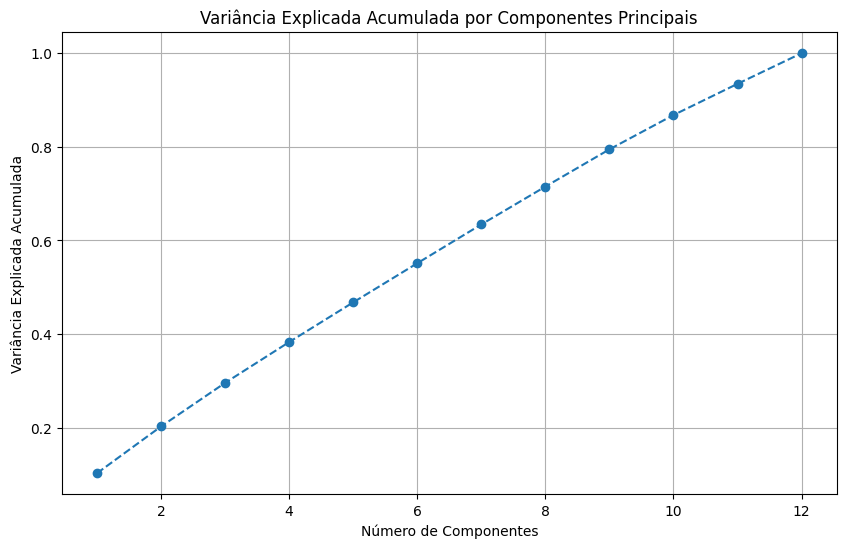

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componentes Principais')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

In [27]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

print(f"Número de componentes para explicar 95% da variância: {pca.n_components_}")

print(f"Dimensões dos dados após PCA: {df_pca.shape}")

Número de componentes para explicar 95% da variância: 12
Dimensões dos dados após PCA: (1852394, 12)


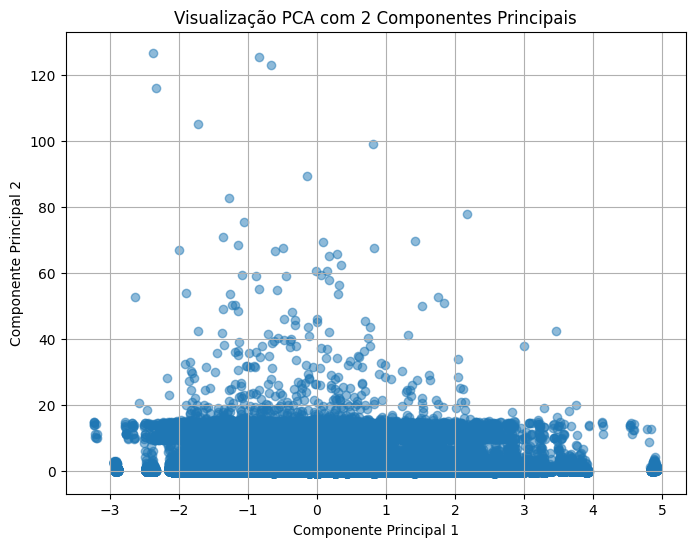

In [28]:
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.5)
plt.title('Visualização PCA com 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Selecionar Algoritmos e Definir Parâmetros a serem testados

## Planejamento do uso do modelo.

 O conjunto de dados tem por objetivo identificar fraudes, sendo essa a variável target. As variáveis do conjunto de dados são em sua maioria variáveis categóricas, sendo assim, utilizamos a biblioteca PyCaret para implementar modelos de aprendizado de máquina.

 Essa biblioteca permite a comparação e escolha do melhor modelo, selecionando as caracteristicas da amostra, treinando o modelo e avaliando desempenho.

 Após a aplicação da biblioteca, a importação e preparação do ambiente fez-se:
  -Limpeza dos dados, removendo linhas de valores ausentes;
  -Verificação da existência de dados duplicados;
  -Definição da variável alvo "is_fraud";
  -Aplicação do PyCaret, realizando as etapas de pré-processamento e configurações automáticas, com tratamento dos valores ausentes, ocorrências das variações categóricas e divisão do conjunto entre treino e teste;
  -Implementação dos modelos: Random Forest e XGBoost a fim de identificar qual deles tem o melhor desempenho entre os modelos de classificação;
  -Após identificação do modelo, é feito o ajuste de Hiperparâmetros;

Por fim, foi aplicado o modelo de regressão logística O modelo escolhido como o mais ajustado para a base de fraude foi o Random Forest, pois é ele é capaz de identificar quais características são mais importantes dentre um conjunto de dados e é um modelo robusto para corrigir imperfeições da amostra, como por exemplo, dados ausentes.

O Random Forest é composto por várias árvores de decisão, onde cada árvore é construída a partir de uma amostra estimada do conjunto de dados e é treinada de forma independente. Ao rodar o modelo, ele gera uma amostragem aleatória durante a construção de cada árvore, utilizando bootstrapping dos dados originais, o que ajuda a introduzir heterogeneidade entre as árvores e selecionar um subconjunto aleatório de recursos diminuindo a robustez do modelo.

Transformação de dados p/ algoritmo

In [29]:
  #Transformação de dados
  df['year'] = df['trans_date_trans_time'].dt.year
  df['month'] = df['trans_date_trans_time'].dt.month
  df['day'] = df['trans_date_trans_time'].dt.day
  df['hour'] = df['trans_date_trans_time'].dt.hour

  #Remoção
  df = df.drop(columns=['trans_date_trans_time'])

In [30]:
for col in ['merchant', 'category', 'first', 'last', 'street', 'job', 'trans_num', 'month_name', 'period']:
    print(f'{col}: {df[col].nunique()} categorias')

merchant: 693 categorias
category: 14 categorias
first: 355 categorias
last: 486 categorias
street: 999 categorias
job: 497 categorias
trans_num: 1852394 categorias
month_name: 12 categorias
period: 3 categorias


In [31]:
#One-Hot Encoding em colunas com poucas categorias
df = pd.get_dummies(df, columns=['merchant', 'category', 'period'], drop_first=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['first'] = le.fit_transform(df['first'])
df['last'] = le.fit_transform(df['last'])
df['street'] = le.fit_transform(df['street'])
df['trans_num'] = le.fit_transform(df['trans_num'])
df['month_name'] = le.fit_transform(df['month_name'])

In [33]:
print(df.dtypes)

Unnamed: 0               int64
cc_num                   int64
amt                      int64
first                    int64
last                     int64
                         ...  
category_shopping_net     bool
category_shopping_pos     bool
category_travel           bool
period_Noite              bool
period_Tarde              bool
Length: 743, dtype: object


In [34]:
df_numeric = df.select_dtypes(include=[float, int])

Algoritmo

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [36]:
# Supondo que 'is_fraud' seja a variável alvo
X = df.drop(columns=['is_fraud'])  # Todas as variáveis preditoras
y = df['is_fraud']  # Variável alvo

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o Label Encoder
le = LabelEncoder()

# Aplicar Label Encoding para colunas categóricas com muitas categorias
for col in ['job', 'street', 'trans_num']:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])

In [38]:
# Filtrar e listar apenas as colunas que ainda são do tipo object
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['job'], dtype='object')


In [39]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o Label Encoder
le = LabelEncoder()

# Aplicar Label Encoding na coluna 'job'
X_train['job'] = le.fit_transform(X_train['job'])
X_test['job'] = le.transform(X_test['job'])  # Certifique-se de aplicar no conjunto de teste também

In [40]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [41]:
#1% do dataset para reduzir o uso de memória
X_train_sample = X_train.sample(frac=0.01, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]  # Garantir que o y corresponda à amostra de X

# conjunto de teste da mesma forma
X_test_sample = X_test.sample(frac=0.01, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

In [42]:
print(X_train.head())

        Unnamed: 0            cc_num   amt  first  last  street    zip  \
717925      717925   213141712584544   115    227    96     755  39073   
45679        45679  6011109736646996  6597    277   120     609  28405   
443926      443926  4306586894261180  3468    279   451     875  47987   
624591      624591   213161293389774  4313     65   462     764  14586   
954803      954803     4464457352619   702     43   375     110  32323   

           lat    long  city_pop  ...  category_home  category_kids_pets  \
717925   32153 -901217     19685  ...          False               False   
45679   342651  -77867    186140  ...          False               False   
443926  401186 -872602      4049  ...           True               False   
624591  430397 -776871     10256  ...           True               False   
954803  298826 -845964       217  ...           True               False   

        category_misc_net  category_misc_pos  category_personal_care  \
717925              False 

In [43]:
# Colunas a serem excluídas
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'lat', 'long']

# Remoção das colunas do conjunto de treino e teste
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Boruta com LightGBM

In [44]:
# Remover caracteres especiais dos nomes das colunas, substituindo-os por '_'
df3.columns = df3.columns.str.replace(r'[^\w]', '_', regex=True)

In [45]:
# Converter `datetime` para timestamp numérico
df3['trans_date_trans_time'] = df3['trans_date_trans_time'].astype('int64') // 10**9

In [46]:
from sklearn.preprocessing import LabelEncoder

# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Transformar colunas categóricas em valores numéricos
categorical_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num', 'month_name', 'period']
for col in categorical_columns:
    df3[col] = label_encoder.fit_transform(df3[col])

In [49]:
pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.9 MB/s eta 0:00:00


In [48]:
pip install "dask[dataframe]"


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 6.0 MB/s eta 0:00:00


In [50]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Conversão de datetime para timestamp
df3['trans_date_trans_time'] = df3['trans_date_trans_time'].astype('int64') // 10**9

# Codificação das colunas categóricas
label_encoder = LabelEncoder()
categorical_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num', 'month_name', 'period']
for col in categorical_columns:
    df3[col] = label_encoder.fit_transform(df3[col])

# Definir X (features) e y (alvo)
X = df3.drop(columns=['is_fraud'])
y = df3['is_fraud']

# Amostragem estratificada (opcional)
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)

# Treinar um modelo LightGBM para calcular a importância das features
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_sample, y_sample)

# Obter as features mais importantes
importances = lgb_model.feature_importances_
important_features = [feature for feature, importance in zip(X_sample.columns, importances) if importance > np.percentile(importances, 75)]  # Manter o top 25%

# Reduzir o dataset às features mais importantes
X_important = X_sample[important_features]

# Aplicar Boruta nas features importantes
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
boruta_selector.fit(X_important.values, y_sample.values)

[LightGBM] [Info] Number of positive: 1930, number of negative: 368548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3974
[LightGBM] [Info] Number of data points in the train set: 370478, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005209 -> initscore=-5.252051
[LightGBM] [Info] Start training from score -5.252051


KeyboardInterrupt: 

Número de Positivos e Negativos:
Positivos: 1,930 exemplos da classe positiva (fraude).
Negativos: 368,548 exemplos da classe negativa (não fraude).

Número de Dados e Features:
Dados de Treinamento: 370,478 linhas.
Features Usadas: 27 características foram utilizadas para treinar o modelo.

Pontuação Inicial (BoostFromScore):
A pontuação inicial foi calculada com base no desequilíbrio de classes, e o valor de pavg=0.005209 corresponde à média ponderada das classes.
O initscore=-5.252051 é a pontuação inicial do modelo, calculada com base na proporção de fraudes, indicando que a classe de fraude é bastante rara.

# Random Forest

Top 10 Features mais importantes:
amt           0.136879
category      0.113118
age           0.074587
hour          0.066541
Unnamed__0    0.050495
city_pop      0.044102
merch_lat     0.041527
merch_long    0.041127
trans_num     0.040529
merchant      0.040141
dtype: float64


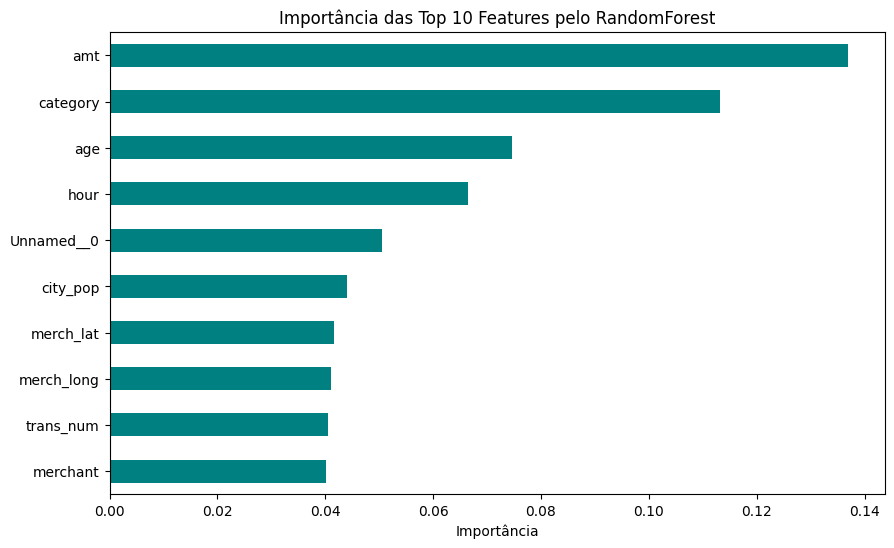

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Passo 1: Preparar os dados
# Convertendo as variáveis categóricas para numéricas (se ainda não foi feito)
df3_encoded = pd.get_dummies(df3)

# Separando as features (X) e a coluna alvo (y)
X = df3_encoded.drop('is_fraud', axis=1)
y = df3_encoded['is_fraud']

# Passo 2: Amostragem dos dados (opcional, caso o dataset seja muito pesado)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.3, random_state=42, stratify=y)

# Passo 3: Treinando o modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_sample, y_sample)

# Passo 4: Obter a importância das features
importances = pd.Series(rf_model.feature_importances_, index=X_sample.columns)
importances_sorted = importances.sort_values(ascending=False)

# Exibir as 10 features mais importantes
print("Top 10 Features mais importantes:")
print(importances_sorted.head(10))

# Visualização das importâncias das features
plt.figure(figsize=(10, 6))
importances_sorted.head(10).plot(kind='barh', color='teal')
plt.title('Importância das Top 10 Features pelo RandomForest')
plt.xlabel('Importância')
plt.gca().invert_yaxis()
plt.show()

# Random Search com RandomizedSearchCV

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

# Remover valores ausentes de X_train e y_train de maneira alinhada
train_data = X_train.copy()
train_data['target'] = y_train

# Remover linhas onde X_train ou y_train tem NaNs
train_data_clean = train_data.dropna()

# Separar novamente X_train_clean e y_train_clean
X_train_clean = train_data_clean.drop(columns=['target'])
y_train_clean = train_data_clean['target']

# X_train_clean e y_train_clean são consistentes?
print(f"Tamanho de X_train_clean: {X_train_clean.shape}")
print(f"Tamanho de y_train_clean: {y_train_clean.shape}")

# Definição de espaço de parâmetros para o Random Search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Inicializar o Random Forest e o RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)

# Amostrar 5% dos dados de treino limpos e garantir que X e y estejam alinhados e Concatenar X_train_clean e y_train_clean para garantir que amostremos dados alinhados
train_data_clean_sampled = train_data_clean.sample(frac=0.05, random_state=42)

# Separar novamente as amostras alinhadas
X_train_sample = train_data_clean_sampled.drop(columns=['target'])
y_train_sample = train_data_clean_sampled['target']

# Verificar os tamanhos para garantir consistência
print(f"Tamanho de X_train_sample: {X_train_sample.shape}")
print(f"Tamanho de y_train_sample: {y_train_sample.shape}")

# Ajuste o RandomizedSearchCV com a amostra
random_search.fit(X_train_sample, y_train_sample)

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados pelo Random Search:")
print(random_search.best_params_)

#Avaliar o modelo ajustado no conjunto de teste
y_pred = random_search.predict(X_test)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Tamanho de X_train_clean: (389002, 28)
Tamanho de y_train_clean: (389002,)
Tamanho de X_train_sample: (19450, 28)
Tamanho de y_train_sample: (19450,)
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Melhores parâmetros encontrados pelo Random Search:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    165847
           1       1.00      0.00      0.00       869

    accuracy                           0.99    166716
   macro avg       1.00      0.50      0.50    166716
weighted avg       0.99      0.99      0.99    166716



# Grid Search com GridSearchCV

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

#Remoção valores ausentes e garantir que os dados estejam limpos e alinhados
train_data = X_train.copy()
train_data['target'] = y_train
train_data_clean = train_data.dropna()

X_train_clean = train_data_clean.drop(columns=['target'])
y_train_clean = train_data_clean['target']

# Verificar tamanhos de X_train_clean e y_train_clean
print(f"Tamanho de X_train_clean: {X_train_clean.shape}")
print(f"Tamanho de y_train_clean: {y_train_clean.shape}")

#Definir o espaço de parâmetros para o Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Inicializar o RandomForestClassifier e o GridSearchCV
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=2, n_jobs=-1, verbose=2)  # Reduzir cv de 3 para 2

# Amostra de 5% dos dados de treino para o ajuste dos parâmetros
train_data_clean_sampled = train_data_clean.sample(frac=0.05, random_state=42)

X_train_sample = train_data_clean_sampled.drop(columns=['target'])
y_train_sample = train_data_clean_sampled['target']

# Tamanhos de X_train_sample e y_train_sample
print(f"Tamanho de X_train_sample: {X_train_sample.shape}")
print(f"Tamanho de y_train_sample: {y_train_sample.shape}")

# AJUSTE o GridSearchCV com a amostra
grid_search.fit(X_train_sample, y_train_sample)

# Exibir os melhores parâmetros encontrados pelo Grid Search
print("Melhores parâmetros encontrados pelo Grid Search:")
print(grid_search.best_params_)

# Avaliar o modelo ajustado no conjunto de teste
y_pred = grid_search.predict(X_test)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))



Tamanho de X_train_clean: (389002, 28)
Tamanho de y_train_clean: (389002,)
Tamanho de X_train_sample: (19450, 28)
Tamanho de y_train_sample: (19450,)
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Melhores parâmetros encontrados pelo Grid Search:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    165847
           1       0.00      0.00      0.00       869

    accuracy                           0.99    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      0.99      0.99    166716



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Pycaret

In [68]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.2 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/inst

In [ ]:
df_cleaned = df.dropna(subset=['is_fraud'])

In [ ]:
import pandas as pd
from pycaret.classification import *

# Usar o DataFrame limpo após remover os valores ausentes
df_cleaned = df.dropna(subset=['is_fraud'])

# Verificar se ainda há índices duplicados
print(df_cleaned.index.duplicated().sum(), "duplicated indices")
df_cleaned = df_cleaned.reset_index(drop=True)

# Definição da variável alvo (target) e as preditoras (X)
target = 'is_fraud'

# Setup do PyCaret
clf_setup = setup(data=df_cleaned, target=target, session_id=42)

In [ ]:
# comparação apenas modelos específicos  (Random Forest e XGBoost)
best_model = compare_models(include=['rf', 'xgboost'])


In [ ]:
# Comparação os modelos de classificação
from pycaret.classification import *
best_model = compare_models()

In [ ]:
# reduçao o número de iterações e usar menos folds
tuned_model = tune_model(best_model, n_iter=10, fold=3)

In [ ]:
#  uso de Logistic Regression modelo mais leve
from pycaret.classification import *
lr_model = create_model('lr')

# Ajuste dos hiperparâmetros no modelo mais leve
tuned_model = tune_model(lr_model, n_iter=10, fold=3)

In [ ]:
# Avaliação do modelo usando uma curva ROC-AUC
plot_model(tuned_model, plot='auc')

# Avaliação do modelo usando a matriz de confusão
plot_model(tuned_model, plot='confusion_matrix')


In [ ]:
# Previsões no conjunto de teste
predictions = predict_model(tuned_model)
print(predictions)
